# Topic modeling on BBC Sports news articles 

## Importing libraries and reading data 

In [1]:
#import the required library

import numpy as np
import pandas as pd
import nltk
import spacy
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_colwidth", 200)

In [3]:
# opening the file using open()

file = open("/home/shubhamsingh/Desktop/files/ML/Categorization of sports article/bbcsports/bbc_sports_articles/003.txt", mode = "rt", encoding = "utf-8")

In [4]:
# read the content of the file by using read()

text = file.read()

In [5]:
# close the file

file.close()

In [6]:
text

'Greene sets sights on world title\n\nMaurice Greene aims to wipe out the pain of losing his Olympic 100m title in Athens by winning a fourth World Championship crown this summer.\n\nHe had to settle for bronze in Greece behind fellow American Justin Gatlin and Francis Obikwelu of Portugal. "It really hurts to look at that medal. It was my mistake. I lost because of the things I did," said Greene, who races in Birmingham on Friday. "It\'s never going to happen again. My goal - I\'m going to win the worlds." Greene crossed the line just 0.02 seconds behind Gatlin, who won in 9.87 seconds in one of the closest and fastest sprints of all time. But Greene believes he lost the race and his title in the semi-finals. "In my semi-final race, I should have won the race but I was conserving energy. "That\'s when Francis Obikwelu came up and I took third because I didn\'t know he was there. "I believe that\'s what put me in lane seven in the final and, while I was in lane seven, I couldn\'t feel 

In [7]:
#read file names

file_names = os.listdir("/home/shubhamsingh/Desktop/files/ML/Categorization of sports article/bbcsports/bbc_sports_articles")

In [8]:
len(file_names)

471

In [9]:
file_names[:10]

['030.txt',
 '179.txt',
 '313.txt',
 '054.txt',
 '440.txt',
 '253.txt',
 '301.txt',
 '400.txt',
 '311.txt',
 '101.txt']

In [10]:
#create empty list

articles = []

for i in file_names:
    file = open('/home/shubhamsingh/Desktop/files/ML/Categorization of sports article/bbcsports/bbc_sports_articles/'+i, mode = "rt", encoding = "utf-8")
    text = file.read()
    file.close()
    
    articles.append(text)

In [11]:
len(articles)

471

In [12]:
articles[223]

'Federer wins title in Rotterdam\n\nWorld number one Roger Federer won the World Indoor Tournament in Rotterdam with a battling 5-7 7-5 7-6 victory over Ivan Ljubicic on Sunday.\n\nThe Swiss star was made to work hard by Ljubicic, who also lost to Federer in last month\'s final in Doha. The Croatian broke his serve for the first time in the tournament to take the first set, but Federer hit back and took the decider on a tie-break. He has now won his last 15 finals after triumphing in two hours and 42 minutes. Federer said: "Today it was very close and it could have gone either way but I\'m happy I fought through because this might be a crucial victory for me for the rest of the season. "I knew I had to fight hard today and that\'s exactly what happened. "I played one shocking game to be broken. He took advantage of it and broke me to love but I still felt I gave that game away. "That haunted me all the way, right until match point. I fought well today so I\'m happy."\n'

## Data cleaning

In [13]:
#create empty list

clean_articles = []

for i in articles:
    clean_articles.append(i.replace("\n", " ").replace("\'", " "))

In [14]:
clean_articles[223]

'Federer wins title in Rotterdam  World number one Roger Federer won the World Indoor Tournament in Rotterdam with a battling 5-7 7-5 7-6 victory over Ivan Ljubicic on Sunday.  The Swiss star was made to work hard by Ljubicic, who also lost to Federer in last month s final in Doha. The Croatian broke his serve for the first time in the tournament to take the first set, but Federer hit back and took the decider on a tie-break. He has now won his last 15 finals after triumphing in two hours and 42 minutes. Federer said: "Today it was very close and it could have gone either way but I m happy I fought through because this might be a crucial victory for me for the rest of the season. "I knew I had to fight hard today and that s exactly what happened. "I played one shocking game to be broken. He took advantage of it and broke me to love but I still felt I gave that game away. "That haunted me all the way, right until match point. I fought well today so I m happy." '

In [15]:
clean_articles = [re.sub("[^a-zA-Z]", " ", x) for x in clean_articles]

In [16]:
clean_articles[223]

'Federer wins title in Rotterdam  World number one Roger Federer won the World Indoor Tournament in Rotterdam with a battling             victory over Ivan Ljubicic on Sunday   The Swiss star was made to work hard by Ljubicic  who also lost to Federer in last month s final in Doha  The Croatian broke his serve for the first time in the tournament to take the first set  but Federer hit back and took the decider on a tie break  He has now won his last    finals after triumphing in two hours and    minutes  Federer said   Today it was very close and it could have gone either way but I m happy I fought through because this might be a crucial victory for me for the rest of the season   I knew I had to fight hard today and that s exactly what happened   I played one shocking game to be broken  He took advantage of it and broke me to love but I still felt I gave that game away   That haunted me all the way  right until match point  I fought well today so I m happy   '

In [17]:
clean_articles = [' '.join([w for w in x.split() if len(w) > 1]) for x in clean_articles]

In [18]:
clean_articles[223]

'Federer wins title in Rotterdam World number one Roger Federer won the World Indoor Tournament in Rotterdam with battling victory over Ivan Ljubicic on Sunday The Swiss star was made to work hard by Ljubicic who also lost to Federer in last month final in Doha The Croatian broke his serve for the first time in the tournament to take the first set but Federer hit back and took the decider on tie break He has now won his last finals after triumphing in two hours and minutes Federer said Today it was very close and it could have gone either way but happy fought through because this might be crucial victory for me for the rest of the season knew had to fight hard today and that exactly what happened played one shocking game to be broken He took advantage of it and broke me to love but still felt gave that game away That haunted me all the way right until match point fought well today so happy'

In [19]:
clean_articles = [x.lower() for x in clean_articles]

In [20]:
clean_articles[223]

'federer wins title in rotterdam world number one roger federer won the world indoor tournament in rotterdam with battling victory over ivan ljubicic on sunday the swiss star was made to work hard by ljubicic who also lost to federer in last month final in doha the croatian broke his serve for the first time in the tournament to take the first set but federer hit back and took the decider on tie break he has now won his last finals after triumphing in two hours and minutes federer said today it was very close and it could have gone either way but happy fought through because this might be crucial victory for me for the rest of the season knew had to fight hard today and that exactly what happened played one shocking game to be broken he took advantage of it and broke me to love but still felt gave that game away that haunted me all the way right until match point fought well today so happy'

In [21]:
def freq_words(x, terms = 30):
    #combine all the articles
    text = ' '.join([text for text in x])
    
    # split it into a list of words
    all_words = text.split()
    
    #prepare a dictionary of word frequency pairs
    fdist = nltk.FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count': list(fdist.values())})
    
    #select top n most frequent words
    d = words_df.nlargest(columns = 'count', n = terms)
    
    #plot the word counts
    plt.figure(figsize = (20, 5))
    ax = sns.barplot(data = d, x = 'word', y = 'count')
    ax.set(ylabel = 'Count')
    plt.show()

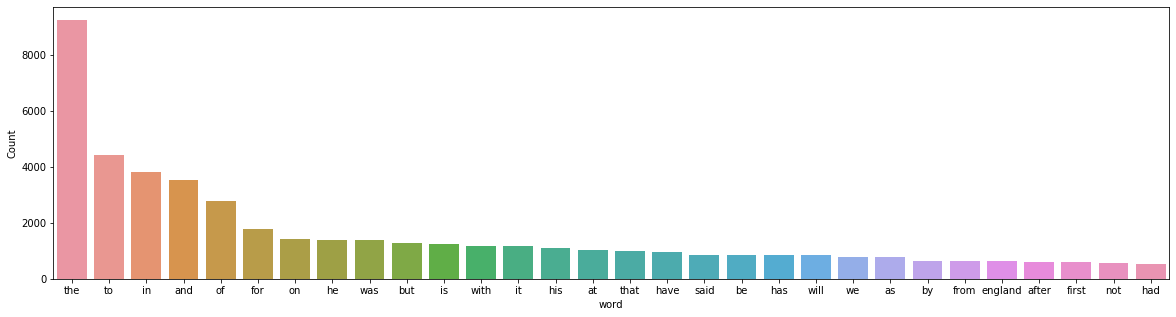

In [22]:
freq_words(clean_articles)

### removing stopwords using spacy

In [23]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [24]:
#lemmetization
clean_articles = [' '.join([token.lemma_ for token in nlp(x)]) for x in clean_articles]

# remove stopwords
clean_articles = [' '.join([w for w in x.split() if nlp.vocab[w].is_stop == False]) for x in clean_articles]

In [25]:
clean_articles[223]

'feder win title rotterdam world number roger federer win world indoor tournament rotterdam battle victory ivan ljubicic sunday swiss star work hard ljubicic lose federer month final doha croatian break -PRON- serve time tournament set federer hit decider tie break -PRON- win -PRON- final triumph hour minute federer today -PRON- close -PRON- way happy fight crucial victory -PRON- rest season know fight hard today exactly happen play shocking game break -PRON- advantage -PRON- break -PRON- love feel game away haunt -PRON- way right match point fight today happy'

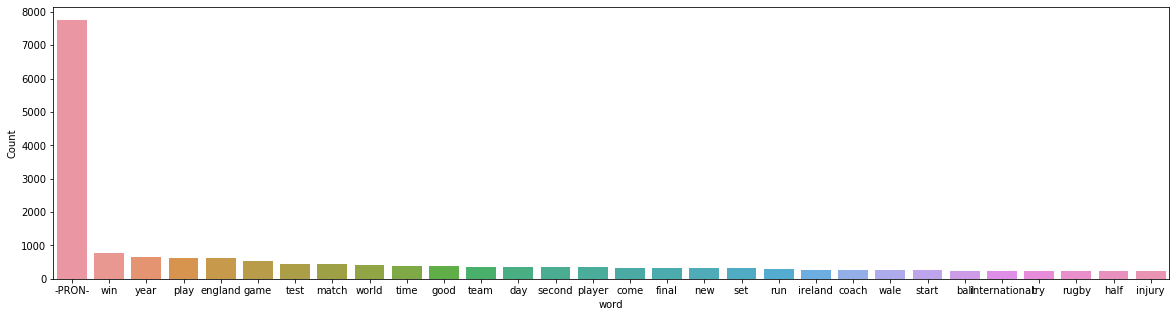

In [26]:
freq_words(clean_articles)

In [27]:
#remove -PRON- tag

clean_articles = [re.sub('-PRON-', '', i) for i in clean_articles]

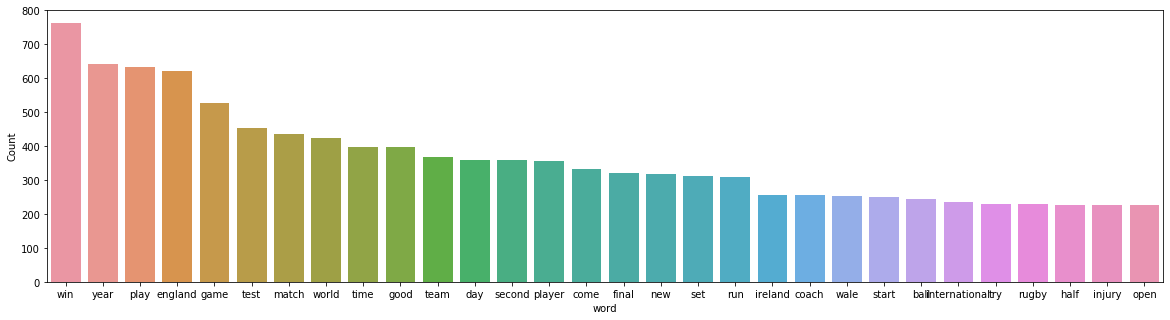

In [28]:
freq_words(clean_articles)

## Topic modeling 

In [29]:
def get_words(x):
    text = ' '.join([text for text in x])
    return set(text.split())

In [30]:
unique_words = get_words(clean_articles)
len(unique_words)

7579

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(clean_articles)

X.shape

(471, 7579)

In [33]:
X_df = pd.SparseDataFrame(X, columns = vectorizer.get_feature_names(), index = range(len(clean_articles)))

In [34]:
X_df.iloc[:10, 1000:1020]

,carlo,carlos,carlsen,carolina,carr,carrier,carroll,carry,carter,cartilage,carve,carwyn,cas,case,casey,cash,casson,cast,castaignede,castigate
0,NaN,NaN,NaN,NaN,NaN,NaN,0.052024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.057147,NaN,NaN,NaN,NaN,NaN,NaN
4,0.05786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
vectorizer = TfidfVectorizer()
vectorizer = TfidfVectorizer(max_features = 1000, min_df = 5, max_df = 0.9)

X = vectorizer.fit_transform(clean_articles)

X.shape

(471, 1000)

In [36]:
from sklearn.decomposition import TruncatedSVD

svd_model = TruncatedSVD(n_components = 4, random_state = 12, n_iter = 100)

In [37]:
svd_model.fit(X)

TruncatedSVD(algorithm='randomized', n_components=4, n_iter=100,
       random_state=12, tol=0.0)

In [38]:
terms = vectorizer.get_feature_names()

for i,comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key = lambda x:x[1], reverse = True)[:50]
    
    print("Topic "+str(i)+": ")
    topics = []
    for t in sorted_terms:
        topics.append(t[0])
        
    print(topics)
    print("\n")

Topic 0: 
['england', 'win', 'play', 'year', 'game', 'test', 'match', 'world', 'good', 'wale', 'player', 'team', 'ireland', 'final', 'time', 'day', 'new', 'cricket', 'rugby', 'second', 'come', 'france', 'set', 'open', 'run', 'injury', 'coach', 'cup', 'think', 'half', 'tour', 'australia', 'south', 'nation', 'start', 'series', 'international', 'victory', 'champion', 'beat', 'try', 'week', 'captain', 'great', 'william', 'season', 'robinson', 'ball', 'lose', 've']


Topic 1: 
['olympic', 'indoor', 'champion', 'win', 'seed', 'world', 'title', 'race', 'open', 'final', 'european', 'set', 'year', 'holme', 'roddick', 'woman', 'event', 'championship', 'athen', 'compete', 'record', 'round', 'britain', 'athlete', 'birmingham', 'federer', 'hewitt', 'break', 'gold', 'beat', 'jump', 'grand', 'american', 'british', 'medal', 'agassi', 'australian', 'athletic', 'second', 'davenport', 'marathon', 'double', 'madrid', 'russian', 'tennis', 'cross', 'old', 'francis', 'henman', 'safin']


Topic 2: 
['wale', '

## Article categorization 

In [39]:
lsa_topic_matrix = svd_model.transform(X)
lsa_topic_matrix.shape

(471, 4)

In [50]:
lsa_topic_matrix[45]

array([ 0.23558268,  0.11794395, -0.10913573,  0.1346263 ])

In [43]:
np.argmax(lsa_topic_matrix[200])

0